![title](static/wcar.png)

# A Kinetoplastid-specific RNA Binding Protein RBP5 cooperates with the transferrin receptor to maintain iron homeostasis in *Trypanosoma brucei*

## Transcriptional profiling of iron regulated genes in BSF T. brucei
The notebook produce the panel "a" and "b" of Figure 2

## set up notebook

In [1]:
#!rm genomes/tb927_6/*

In [2]:
#reload when modified
%load_ext autoreload
%autoreload 2
#activate r magic
%load_ext rpy2.ipython
%matplotlib inline

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utilities as UT
import missingno as msno
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import gc

random.seed(1976)
np.random.seed(1976)

# Data Anaylsis

## Experiment SetUp

In [4]:
from IPython.display import Image

In [5]:
!cp genomes/tb927_3/tb927_3.gff .

In [6]:
#create a dictionary of gene to desc
#from the gff file
def make_desc(_GFF):
    gff =pd.read_csv( _GFF, sep='\t', header=None, comment='#')
    
    gff = gff[gff.iloc[:,2]=='gene']
    #print( gff[gff[gff.columns[-1]].str.contains('Tb427_020006200')] )
    desc = {}
    for n in gff.iloc[:,-1]:
        n=n.replace('%2C',' ')
        item_list = n.split(';')
        #print (item_list)
        temp_dict = {}
        for m in item_list:
            #print(m)
            temp_dict[m.split('=')[0].strip()]=m.split('=')[1].strip()
        #print(temp_dict['ID'])
        #print(temp_dict['description'])
        desc[temp_dict['ID']]=temp_dict.get('description','none')
    return desc

desc_dict = make_desc('tb927_3.gff')
desc_dict['Tb10.v4.0073']

'variant surface glycoprotein (VSG  pseudogene)  putative'

In [7]:
#read all the rna-seq reads counts for each sampe
exp = '{life_stage}{replica}'
list_df = [exp.format(
    life_stage=life_stage,
    replica=replica) 
 for life_stage in ['C','D','DF','F']
 for replica in ['1','2','3']]

#aggregate counts in one dataframe
list_df = [n+'/res/'+n+'/counts.txt' for n in list_df]
list_df =[pd.read_csv(n,index_col=[0],comment='#',sep='\t') for n in list_df]
df = list_df[0].copy()
for temp_df in list_df[1:]:
    df = df.join(temp_df.iloc[:,-1])
df.head()
#temp_df = pd.read_csv('BSF/tb927_3_ks_counts_final.txt',index_col=[0],comment='#',sep='\t')

,Chr,Start,End,Strand,Length,/tmp/2992.1.all.q/C1/C1_sorted.bam,/tmp/2993.1.all.q/C2/C2_sorted.bam,/tmp/2994.1.all.q/C3/C3_sorted.bam,/tmp/2995.1.all.q/D1/D1_sorted.bam,/tmp/2996.1.all.q/D2/D2_sorted.bam,/tmp/2997.1.all.q/D3/D3_sorted.bam,/tmp/2998.1.all.q/DF1/DF1_sorted.bam,/tmp/2999.1.all.q/DF2/DF2_sorted.bam,/tmp/3000.1.all.q/DF3/DF3_sorted.bam,/tmp/3001.1.all.q/F1/F1_sorted.bam,/tmp/3002.1.all.q/F2/F2_sorted.bam,/tmp/3003.1.all.q/F3/F3_sorted.bam
Geneid,,,,,,,,,,,,,,,,,
Tb10.v4.0073,tryp_X-188b09.p2kB601,929,1489,+,561,0,0,0,1,1,0,0,2,0,0,0,2
Tb10.v4.0074,tryp_X-188b09.p2kB601,2775,3452,+,678,0,0,0,2,2,4,0,0,0,0,0,1
Tb10.v4.0075,tryp_X-188b09.p2kB601,3781,5223,+,1443,0,0,1,0,2,0,0,0,0,0,0,0
Tb10.v4.0076,tryp_X-188b09.p2kB601,6264,7721,+,1458,0,0,0,0,0,0,0,0,0,0,0,0
Tb10.v4.0077,tryp_X-188b09.p2kB601,9669,10955,+,1287,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
#df = pd.read_csv('InData/tb927_3_ks_counts_final.txt',index_col=[0],comment='#',sep='\t')
#df.head()
#data_col = df.columns[6:25]


In [13]:
data_col = df.columns[5:]
data_col

Index(['/tmp/2992.1.all.q/C1/C1_sorted.bam',
       '/tmp/2993.1.all.q/C2/C2_sorted.bam',
       '/tmp/2994.1.all.q/C3/C3_sorted.bam',
       '/tmp/2995.1.all.q/D1/D1_sorted.bam',
       '/tmp/2996.1.all.q/D2/D2_sorted.bam',
       '/tmp/2997.1.all.q/D3/D3_sorted.bam',
       '/tmp/2998.1.all.q/DF1/DF1_sorted.bam',
       '/tmp/2999.1.all.q/DF2/DF2_sorted.bam',
       '/tmp/3000.1.all.q/DF3/DF3_sorted.bam',
       '/tmp/3001.1.all.q/F1/F1_sorted.bam',
       '/tmp/3002.1.all.q/F2/F2_sorted.bam',
       '/tmp/3003.1.all.q/F3/F3_sorted.bam'],
      dtype='object')

In [14]:
#rename columns for convenience
indata = df[data_col]
indata.columns = [n.split('/')[3] for  n in indata.columns]
indata.head()

,C1,C2,C3,D1,D2,D3,DF1,DF2,DF3,F1,F2,F3
Geneid,,,,,,,,,,,,
Tb10.v4.0073,0,0,0,1,1,0,0,2,0,0,0,2
Tb10.v4.0074,0,0,0,2,2,4,0,0,0,0,0,1
Tb10.v4.0075,0,0,1,0,2,0,0,0,0,0,0,0
Tb10.v4.0076,0,0,0,0,0,0,0,0,0,0,0,0
Tb10.v4.0077,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
print(indata.shape)
indata=indata.dropna()
print(indata.shape)
#indata.loc['KS17gene_1749a']
#indata['desc']=[desc_dict.get(n,'none') for n in indata.index.values]
#indata.to_csv('indata.csv')
#indata.head()
#indata.loc['mainVSG-427-2']

(19949, 12)
(19949, 12)


## QC - Missing Data Viz

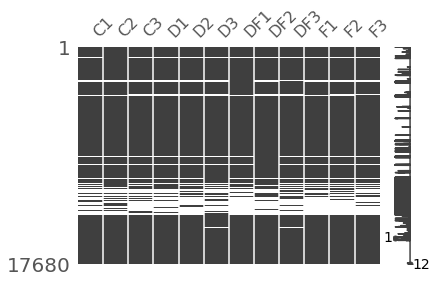

In [16]:
msno.matrix(indata.replace(0,np.nan).dropna(how='all'),figsize=(6, 4))

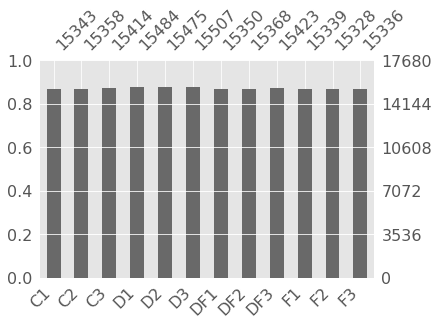

In [17]:
msno.bar(indata.replace(0,np.nan).dropna(how='all'),figsize=(6, 4))

## QC - Corr analysis

In [18]:
!mkdir -p Figures

(11.5, 0.5)


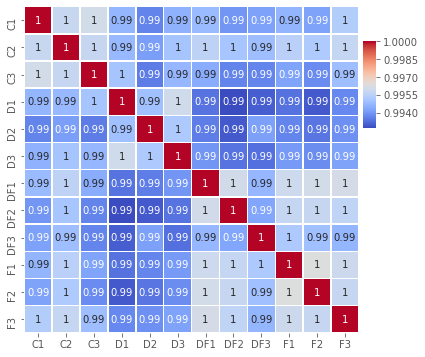

In [19]:
fig,ax=plt.subplots(figsize=(6,6))
cbar_ax = fig.add_axes([.91, .6, .03, .2])
sns.heatmap(np.log2(indata).corr(),
            #vmin=-1,
            cmap='coolwarm',
            annot=True,linewidths=.5,ax=ax, cbar_ax = cbar_ax, cbar=True)
print(ax.get_ylim())
ax.set_ylim(12,0)
plt.savefig('Figures/Figure_2.png')
plt.show()

## QC - MSD

{'r': 'C', 'b': 'D', 'g': 'DF', 'y': 'F'}


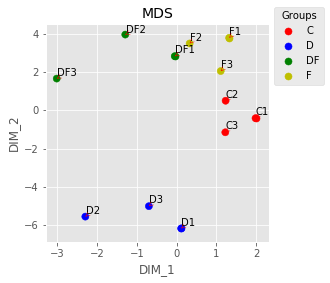

In [20]:
plt.style.use('ggplot')
palette = ['r']*3+['b']*3+['g']*3+['y']*3
fig,ax = plt.subplots(figsize=(4,4), ncols=1, nrows=1)
UT.make_mds(np.log2(indata),palette,ax,color_dictionary={'r':'C','b':'D',
                                                        'g':'DF','y':'F',})
plt.savefig('Figures/Figure_3.png')
plt.show()

## Compute Length and GC content
this information is used to check for length and GC bias

In [21]:
!mkdir -p InData

In [28]:
!gtf2bed < tb927_6.gtf > tb927_6.bed
!bedtools nuc -fi tb927_6.fa -bed tb927_6.bed >InData/GC_content_927.txt

index file tb927_6.fa.fai not found, generating...


In [23]:
#!bowtie2-build genomes/tb927_5/tb927_5.fa genomes/tb927_5/tb927_5

In [24]:
def get_gene_ids(n):
    res = {}
    temp = n.split(';')
    temp =[n.strip() for n in temp if len(n)>2]
    for f in temp:
        key = f.split(' ')[0]
        value = f.split(' ')[1]
        key=key.replace('\"','').replace('\'','').strip()
        value=value.replace('\"','').replace('\'','').strip()
        res[key]=value
    return res['gene_id']

In [25]:
gc_content = pd.read_csv('InData/GC_content_927.txt',sep='\t')
gc_content = gc_content[gc_content['8_usercol']=='transcript']
gc_content['gene_id'] = [get_gene_ids(n) for n in gc_content['10_usercol']]
gc_content = gc_content.drop_duplicates('gene_id')
gc_content.set_index('gene_id',inplace=True)
gc_content=gc_content[['19_seq_len','12_pct_gc']]
gc_content.columns = ['length', 'gccontent']
gc_content.head()

,length,gccontent
gene_id,,
MSTRG.1,2768,0.505419
MSTRG.2,2482,0.304593
TRY.1,746,0.273458
TRY.2,1531,0.288047
TRY.3,1390,0.379856


In [26]:
indata.head()
indata.astype(int).to_csv('indata.csv',index=True)

In [27]:
metadata=pd.DataFrame()
metadata['samples']=indata.columns
metadata['treatment']=['C','C','C','D','D','D','DF','DF','DF','F','F','F']
metadata['batch']=1
metadata.reset_index().to_csv('metadata.csv')

In [28]:
print(indata.shape)
indata=indata.join(gc_content,how='inner')
gc_content = gc_content[['length', 'gccontent']]
indata.drop(['length', 'gccontent'],axis=1,inplace=True) 


(19949, 12)


### edgeR to filter low counts

In [30]:
%%R -i indata
options(warn=-1)
library("limma") 
library("edgeR")
head(indata)

             C1 C2 C3 D1 D2 D3 DF1 DF2 DF3 F1 F2 F3
Tb10.v4.0073  0  0  0  1  1  0   0   2   0  0  0  2
Tb10.v4.0074  0  0  0  2  2  4   0   0   0  0  0  1
Tb10.v4.0075  0  0  1  0  2  0   0   0   0  0  0  0
Tb10.v4.0076  0  0  0  0  0  0   0   0   0  0  0  0
Tb10.v4.0077  0  0  0  0  0  0   0   0   0  0  0  0
Tb10.v4.0078 39 23 33 37 42 48  32  32  30 30 23 15


In [31]:
%%R
group <- factor(c(
    'C','C','C',
    'D','D','D',
    'DF','DF','DF',
    'F','F','F'
))

y <- DGEList(counts=indata,group=group)
keep <- filterByExpr(y)
y <- y[keep,,keep.lib.sizes=FALSE]
counts = y$counts
genes = row.names(y)

In [32]:
%R -o counts,genes
indata = pd.DataFrame(counts,index=genes,columns=indata.columns)
indata.shape

(14197, 12)

In [33]:
indata=indata.join(gc_content,how='inner')
indata.shape

(14197, 14)

### GC / length content

In [34]:
gc_content = indata[['length', 'gccontent']]
indata.drop(['length', 'gccontent'],axis=1,inplace=True)
print(indata.shape,gc_content.shape)
indata.head()

(14197, 12) (14197, 2)


,C1,C2,C3,D1,D2,D3,DF1,DF2,DF3,F1,F2,F3
Tb10.v4.0078,39,23,33,37,42,48,32,32,30,30,23,15
Tb927.8.150,33,33,32,38,47,45,30,33,40,34,38,34
Tb927.8.270,663,656,664,780,851,696,607,634,776,639,642,653
Tb927.8.320,8,8,12,12,10,9,11,8,7,6,4,5
Tb927.8.443,584,657,491,552,473,555,695,721,632,677,632,667


### size factors

In [35]:
sizeFactors=indata.sum()
sizeFactors = sizeFactors.values
sizeFactors

array([51767769, 51799666, 51593023, 50456469, 52628498, 51584250,
       50996965, 52128172, 50805436, 52014036, 50952074, 52216581])

In [36]:
#np.log2(gc_content['length']/1000).plot(kind='hist')

### Bias Correction

In [37]:
%%R -i gc_content,indata,sizeFactors
library(cqn)
library(scales)

2020-12-08 10:33:39,956 [37100] WARNING  rpy2.rinterface_lib.callbacks:119: [JupyterRequire] R[write to console]: Loading required package: mclust

2020-12-08 10:33:40,107 [37100] WARNING  rpy2.rinterface_lib.callbacks:119: [JupyterRequire] R[write to console]: Package 'mclust' version 5.4.6
Type 'citation("mclust")' for citing this R package in publications.

2020-12-08 10:33:40,118 [37100] WARNING  rpy2.rinterface_lib.callbacks:119: [JupyterRequire] R[write to console]: Loading required package: nor1mix

2020-12-08 10:33:40,161 [37100] WARNING  rpy2.rinterface_lib.callbacks:119: [JupyterRequire] R[write to console]: Loading required package: preprocessCore

2020-12-08 10:33:40,203 [37100] WARNING  rpy2.rinterface_lib.callbacks:119: [JupyterRequire] R[write to console]: Loading required package: splines

2020-12-08 10:33:40,316 [37100] WARNING  rpy2.rinterface_lib.callbacks:119: [JupyterRequire] R[write to console]: Loading required package: quantreg

2020-12-08 10:33:40,329 [37100] W

In [38]:
%%R
stopifnot(all(rownames(indata) == rownames(gc_content)))
cqn.subset <- cqn(indata, lengths = gc_content$length,
                  x = gc_content$gccontent, sizeFactors = sizeFactors,
                  verbose = TRUE)

RQ fit ............
SQN .


In [39]:
#%R cqn.subset

### Viz Bias

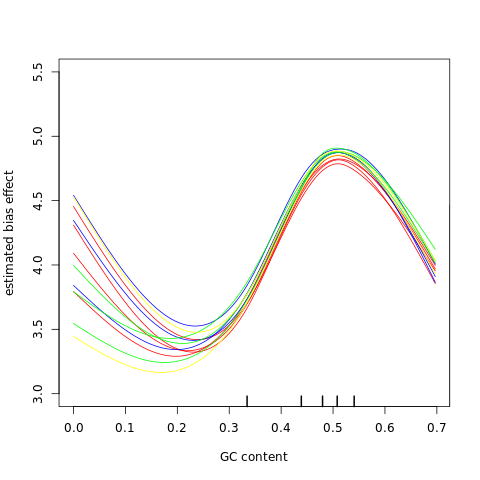

In [40]:
%%R
cqnplot <- function(x, n = 1, col = "grey60", ylab="estimated bias effect", 
                    xlab = "", type = "l", lty = 1, ...) {
    if(class(x) != "cqn")
        stop("'x' needs to be of class 'cqn'")
    if(n == 1) {
        func <- x$func1
        grid <- x$grid1
        knots <- x$knots1
    }
    if(n == 2) {
        if(is.null(x$func2))
            stop("argument 'x' does not appear to have two smooth functions (component 'func2' is NULL)")
        func <- x$func2
        grid <- x$grid2
        knots <- x$knots2
    }
    
    
    #par(mar=c(5.1, 4.1, 4.1, 8.1), xpd=TRUE)
    matplot(replicate(ncol(func), grid), func, ylab = ylab, xlab = xlab, type = type,
            col = col, lty = lty, ...)
    
    legend("bottomleft", legend = colnames(x$counts), inset=c(1,0),
           title="Samples", lty = lty, col = col)
    rug(knots, lwd = 2)
    invisible(x)
    
}


library(repr)
#options(repr.plot.width = 10, repr.plot.height = 0.75)
# Change plot size to 4 x 3
#options(repr.plot.width=4, repr.plot.height=3)


colors <- c(
    'red','red','red','red',
    'blue','blue','blue',
    'green','green','green',
    'yellow','yellow','yellow'
           )
lty =c(1,1,1,
       1,1,1,
      1,1,1,
      1,1,1)

#png("Figures/Figure_12.png")
#par(mfrow=c(1,2))
cqnplot(cqn.subset, col=colors,
        n = 1, xlab = "GC content", lty = lty,
        ylim = c(3, 5.5), 
        
       )
#dev.off()

#ggsave('plot.png', width=8.27, height= 11.69) #A4 size in inches
#dev.off()

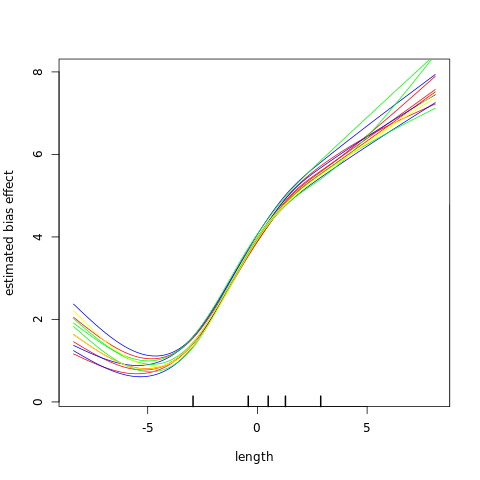

In [41]:
%%R
library(repr)
#options(repr.plot.width = 12, repr.plot.height = 0.75)
# Change plot size to 4 x 3
#options(repr.plot.width=8, repr.plot.height=3)


colors <- c(
    'red','red','red','red',
    'blue','blue','blue',
    'green','green','green',
    'yellow','yellow','yellow'
           )
lty =c(1,1,1,
       1,1,1,
      1,1,1,
      1,1,1)

#par(mfrow=c(1,2))
#png("Figures/Figure_13.png")
cqnplot(cqn.subset, col=colors,
        n = 2, xlab = "length", lty = lty,
        ylim = c(0.2,8), 
    
       )
#dev.off()

### Bias Correction

In [42]:
%%R
RPKM.cqn <- cqn.subset$y + cqn.subset$offset
out_table <- RPKM.cqn
head(out_table)

                    C1         C2         C3         D1        D2        D3
Tb10.v4.0078  1.126061  0.2893553  0.9015296  1.0686471  1.105956  1.339005
Tb927.8.150  -2.191867 -2.2840455 -2.3159033 -1.8704321 -2.259201 -1.805501
Tb927.8.270   2.560256  2.5471768  2.5013497  2.6636831  2.537044  2.526281
Tb927.8.320  -3.546170 -3.6075203 -3.0844825 -2.9134271 -3.848435 -3.457142
Tb927.8.443   6.704737  6.8362039  6.4368494  6.6008571  6.306796  6.581418
Tb927.8.449   1.806259  1.1318399  1.6605485  0.9680333  1.184406  1.317674
                    DF1        DF2        DF3         F1         F2         F3
Tb10.v4.0078  0.7990661  0.7209996  0.5712077  0.7021262  0.2749578 -0.2744727
Tb927.8.150  -2.5708593 -2.2083582 -2.2327610 -2.1910261 -2.0210714 -2.1176369
Tb927.8.270   2.4908056  2.4949426  2.3299116  2.5329623  2.5517273  2.5411530
Tb927.8.320  -3.3523268 -3.4903132 -4.0163784 -3.9392996 -4.4111143 -4.0769322
Tb927.8.443   7.0038602  7.0373766  6.8073648  6.9081614  6.8458172  6.89

In [43]:
#out_table

In [44]:
%R -o out_table
out_table = pd.DataFrame(out_table,index=indata.index.values,columns=indata.columns)
out_table.head()

,C1,C2,C3,D1,D2,D3,DF1,DF2,DF3,F1,F2,F3
Tb10.v4.0078,1.126061,0.289355,0.901530,1.068647,1.105956,1.339005,0.799066,0.721000,0.571208,0.702126,0.274958,-0.274473
Tb927.8.150,-2.191867,-2.284045,-2.315903,-1.870432,-2.259201,-1.805501,-2.570859,-2.208358,-2.232761,-2.191026,-2.021071,-2.117637
Tb927.8.270,2.560256,2.547177,2.501350,2.663683,2.537044,2.526281,2.490806,2.494943,2.329912,2.532962,2.551727,2.541153
Tb927.8.320,-3.546170,-3.607520,-3.084483,-2.913427,-3.848435,-3.457142,-3.352327,-3.490313,-4.016378,-3.939300,-4.411114,-4.076932
Tb927.8.443,6.704737,6.836204,6.436849,6.600857,6.306796,6.581418,7.003860,7.037377,6.807365,6.908161,6.845817,6.891277


### Visualise Normalized Counts

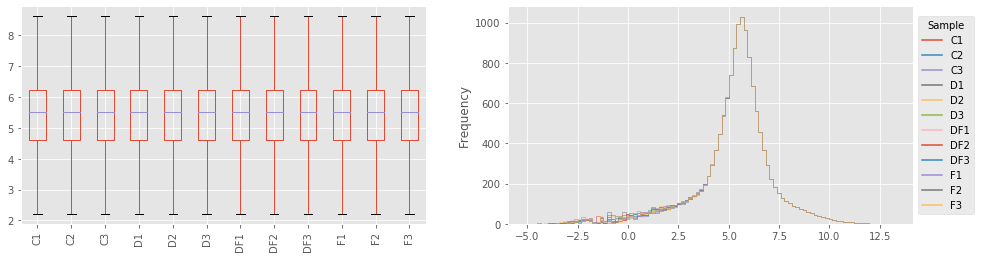

(14197, 12)


In [45]:
fig,axes=plt.subplots(figsize=(16,4),ncols=2)
ax = axes[0]
out_table.plot(kind='box',ax=ax,rot=90,showfliers=False)

ax = axes[1]
out_table.replace(-np.inf,-1.5).plot(kind='hist',
                                            histtype='step',
                                            bins=100,ax=ax)
UT.hist_legend(ax,'Sample')
#ax.set_xticklabels(out_df.columns, rotation=90, )
plt.show()
print(out_table.shape)

## Differential Expression Analysis
Little if any GC and length bias, just getting on with DE

In [46]:
%%R
library(edgeR)
# Make groups
design_with_all <- model.matrix( ~0+group )
y <- DGEList(counts=indata, group = group)
y <- calcNormFactors(y)

y <- estimateDisp(y, design_with_all)
# Estimate dispersion
# Fit counts to model
fit_all <- glmQLFit( y, design_with_all )

In [47]:
%%R
contrastDC <- glmQLFTest( fit_all, contrast=makeContrasts( groupD-groupC, levels=design_with_all ) )
tableDC <- topTags(contrastDC, n=Inf, sort.by = "none", adjust.method="BH")$table
head(tableDC)

                   logFC     logCPM          F     PValue       FDR
Tb10.v4.0078  0.36148673 -0.6020157 2.68740696 0.12094164 0.3191780
Tb927.8.150   0.35003212 -0.4258011 4.88268749 0.06721565 0.2208936
Tb927.8.270   0.17421418  3.7407194 5.15640114 0.03754798 0.1547819
Tb927.8.320   0.08999977 -2.3199476 0.08255392 0.80908358 0.9075300
Tb927.8.443  -0.18502367  3.5739108 3.02111267 0.10167460 0.2851589
Tb927.8.449  -0.37536786 -1.4475018 1.71968473 0.20851127 0.4369400


In [48]:
%%R
contrastDDF <- glmQLFTest( fit_all, contrast=makeContrasts( groupD-groupDF, levels=design_with_all ) )
tableDDF <- topTags(contrastDDF, n=Inf, sort.by = "none", adjust.method="BH")$table
head(tableDDF)


                  logFC     logCPM          F       PValue         FDR
Tb10.v4.0078  0.3784196 -0.6020157  2.9319964 0.1064341983 0.225654034
Tb927.8.150   0.2808284 -0.4258011  3.2087075 0.1376720316 0.269033700
Tb927.8.270   0.1533285  3.7407194  4.0044381 0.0629019906 0.155677022
Tb927.8.320   0.1968926 -2.3199476  0.3817972 0.6023590411 0.737595008
Tb927.8.443  -0.4262638  3.5739108 16.4397658 0.0009455344 0.008225338
Tb927.8.449  -0.2930562 -1.4475018  1.0220519 0.3272974035 0.490872070


In [49]:
%%R
contrastDF <- glmQLFTest( fit_all, contrast=makeContrasts( groupD-groupF, levels=design_with_all ) )
tableDF <- topTags(contrastDF, n=Inf, sort.by = "none", adjust.method="BH")$table
head(tableDF)


                  logFC     logCPM         F      PValue        FDR
Tb10.v4.0078  0.8324422 -0.6020157 12.346826 0.002934113 0.01709656
Tb927.8.150   0.2277149 -0.4258011  2.134789 0.224175641 0.37328426
Tb927.8.270   0.2008321  3.7407194  6.825606 0.019018155 0.06491963
Tb927.8.320   0.9649664 -2.3199476  7.093722 0.025627488 0.08022788
Tb927.8.443  -0.3843780  3.5739108 13.300917 0.002218442 0.01415545
Tb927.8.449  -0.3042787 -1.4475018  1.101866 0.309681874 0.46662636


In [50]:
%%R
contrastFC <- glmQLFTest( fit_all, contrast=makeContrasts( groupF-groupC, levels=design_with_all ) )
tableFC <- topTags(contrastFC, n=Inf, sort.by = "none", adjust.method="BH")$table
head(tableFC)


                   logFC     logCPM          F     PValue       FDR
Tb10.v4.0078 -0.47095551 -0.6020157 3.51023878 0.07964860 0.2300972
Tb927.8.150   0.12231717 -0.4258011 0.54905268 0.54387645 0.7225729
Tb927.8.270  -0.02661789  3.7407194 0.11721848 0.73659272 0.8546985
Tb927.8.320  -0.87496659 -2.3199476 5.57536346 0.04806519 0.1724157
Tb927.8.443   0.19935435  3.5739108 3.63532663 0.07495816 0.2230052
Tb927.8.449  -0.07108915 -1.4475018 0.06642519 0.79994842 0.8915675


In [51]:
%%R
contrast_mine <- glmQLFTest( fit_all, contrast=makeContrasts( groupD-(groupDF+groupC+groupF)/3, levels=design_with_all ) )
table_mine <- topTags(contrast_mine, n=Inf, sort.by = "none", adjust.method="BH")$table
head(table_mine)


                  logFC     logCPM         F      PValue        FDR
Tb10.v4.0078  0.5241162 -0.6020157  8.421475 0.010520086 0.04184748
Tb927.8.150   0.2861918 -0.4258011  5.126944 0.060484573 0.14931769
Tb927.8.270   0.1761249  3.7407194  8.065740 0.011953132 0.04597633
Tb927.8.320   0.4172862 -2.3199476  2.462648 0.187151749 0.33518272
Tb927.8.443  -0.3318885  3.5739108 14.386165 0.001633858 0.01108790
Tb927.8.449  -0.3242343 -1.4475018  1.871685 0.190465532 0.33913963


In [54]:
#tableDC
#tableDDF
#tableDF
#tableFC
#table_mine

In [55]:
%R -o tableDC,tableDDF,tableDF,tableFC,table_mine

def mod_table(intable):
    intable['mlog10FDR']=-np.log10(intable['FDR'])
    intable['mlog10pvalue']=-np.log10(intable['PValue'])
    intable['desc']=[desc_dict.get(n,n) for n in intable.index.values]
    return intable

tableDC = mod_table(tableDC)
tableDDF = mod_table(tableDDF)
tableDF = mod_table(tableDF)
tableFC = mod_table(tableFC)
table_mine = mod_table(table_mine)

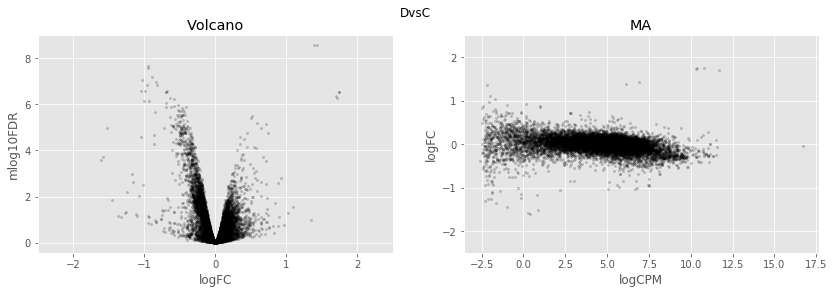

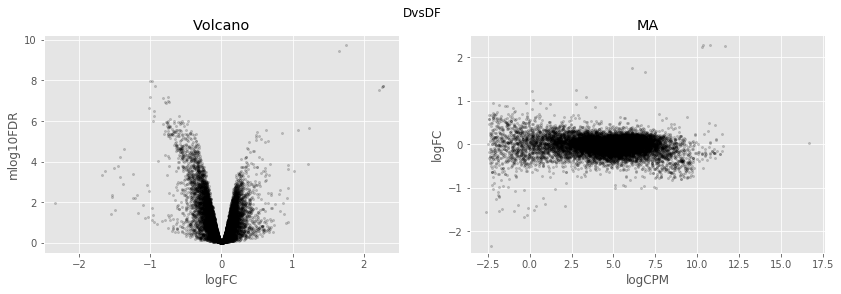

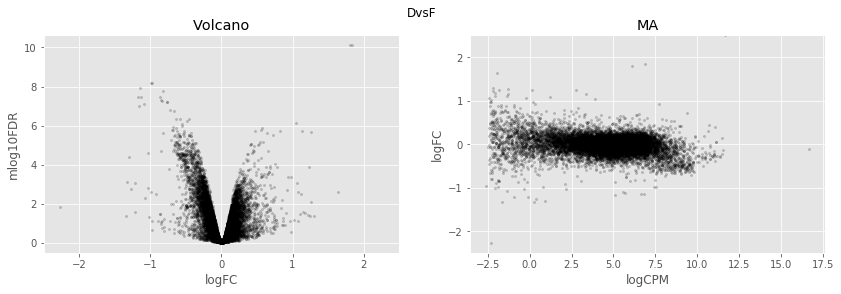

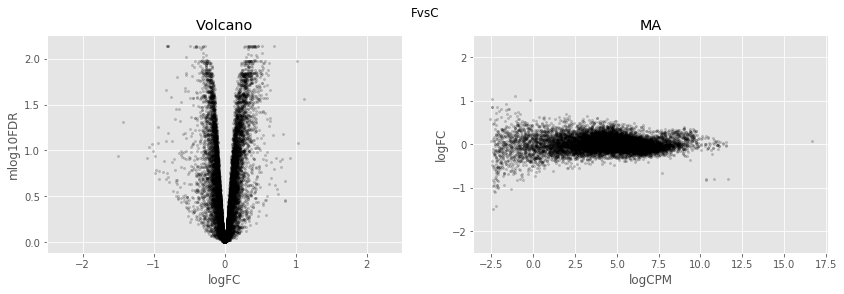

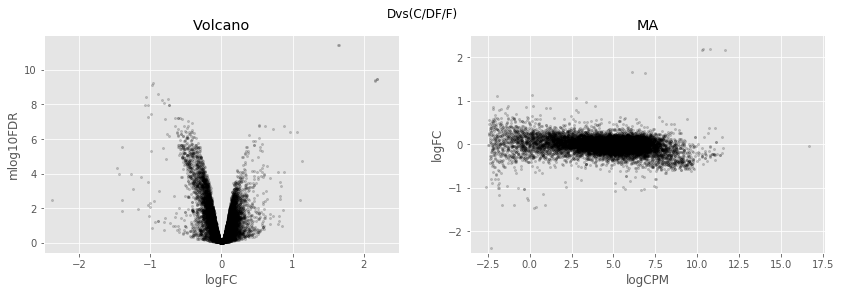

In [56]:
for table,name in zip([tableDC,tableDDF,tableDF,tableFC,table_mine],
                 ['DvsC','DvsDF','DvsF','FvsC','Dvs(C/DF/F)']):

    fig,axes=plt.subplots(figsize=(14,4), ncols=2, nrows=1)
    ax=axes[0]
    table.plot(x='logFC',y='mlog10FDR',
           kind='scatter',s=5,alpha=0.2,ax=ax,c='black')
    ax.set_xlim(-2.5,2.5)
    ax.set_title('Volcano')
    ax=axes[1]
    table.plot(x='logCPM',y='logFC',
           kind='scatter',s=5,alpha=0.2,ax=ax,c='black')
    ax.set_ylim(-2.5,2.5)
    ax.set_title('MA')
    plt.suptitle(name)
    plt.show()

In [57]:
np.log10(0.01)

-2.0

In [58]:
def annotated_volcano(table,name,selection=False):
    
    fig,axes=plt.subplots(figsize=(8,6), ncols=1, nrows=1)
    ax=axes
    if not selection:
        selection = table[((table['logFC']>1)|(table['logFC']<-1))
                          &(table['mlog10FDR']>2)&(table['logCPM']>2)]
    else:
        selection = table.loc[selection]
    annot_index = selection.index.values
    annot_names = selection['desc']
    UT.make_vulcano(
        table,
        ax,
        x='logFC',
        y='mlog10FDR',
        fc_col = 'logFC',
        pval_col = 'FDR',
        pval_limit=0.01,
        fc_limit=1,
        annot_index=annot_index ,
        annot_names=annot_names)
    ax.legend(loc='upper center', bbox_to_anchor=(0.8, 1.2), title='Legend')
    ax.set_xlim(-3,3)
    plt.title(name)

2020-12-08 10:36:47,068 [37100] WARNING  matplotlib.legend:1282: [JupyterRequire] No handles with labels found to put in legend.
2020-12-08 10:36:47,070 [37100] WARNING  matplotlib.legend:1282: [JupyterRequire] No handles with labels found to put in legend.


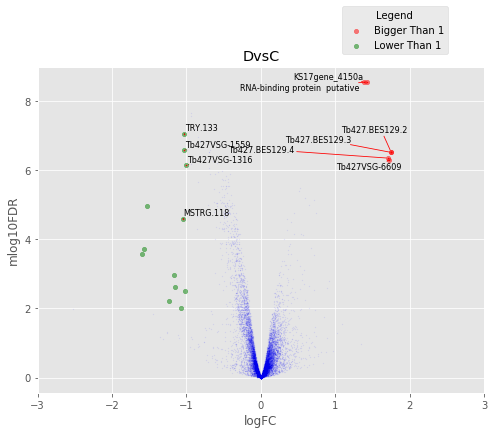

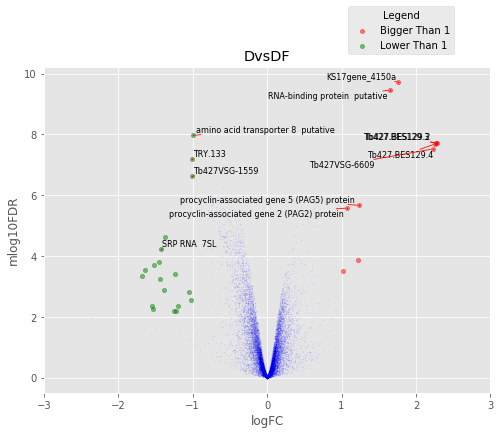

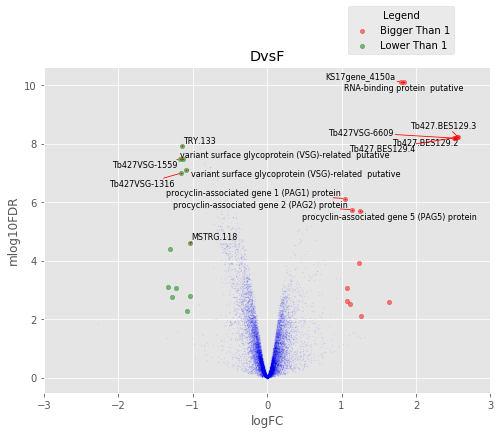

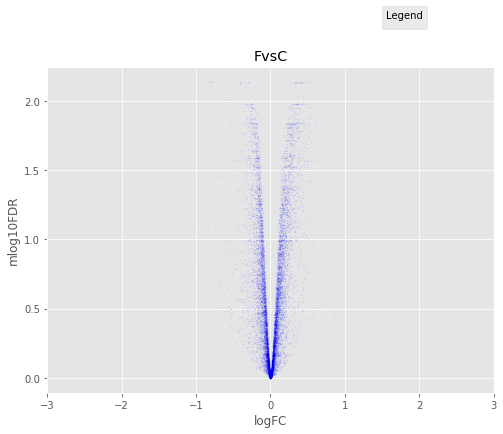

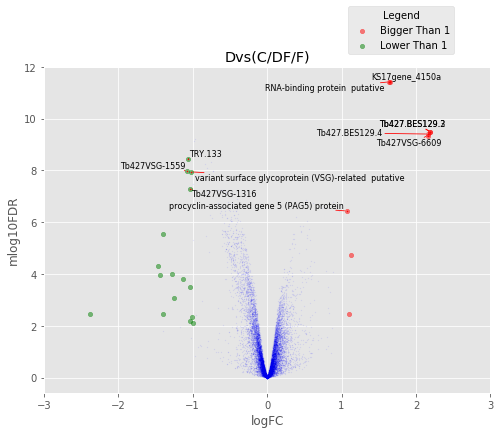

In [59]:
for table,name in zip([tableDC,tableDDF,tableDF,tableFC,table_mine],
                 ['DvsC','DvsDF','DvsF','FvsC','Dvs(C/DF/F)']):
    annotated_volcano(table,name)

In [60]:
table_dict = {}
for  table,name  in zip([tableDC,tableDDF,tableDF],['tableDC','tableDDF','tableDF']):
                    
    selection = table[((table['logFC']>1)|(table['logFC']<-1))
                          &(table['mlog10FDR']>2)&(table['logCPM']>1)]
    
    table_dict[name]= list(selection.index.values)


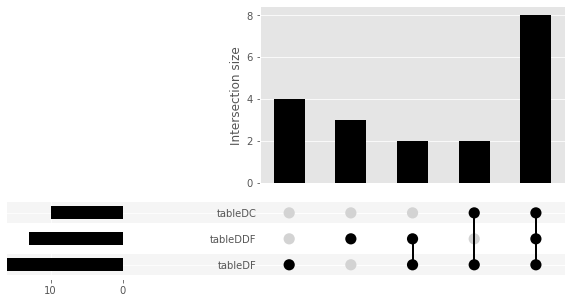

In [61]:
from upsetplot import plot,UpSet
from upsetplot import from_contents
import matplotlib
data_upset = from_contents(table_dict)
plot(data_upset)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [62]:
from pyvenn import venn

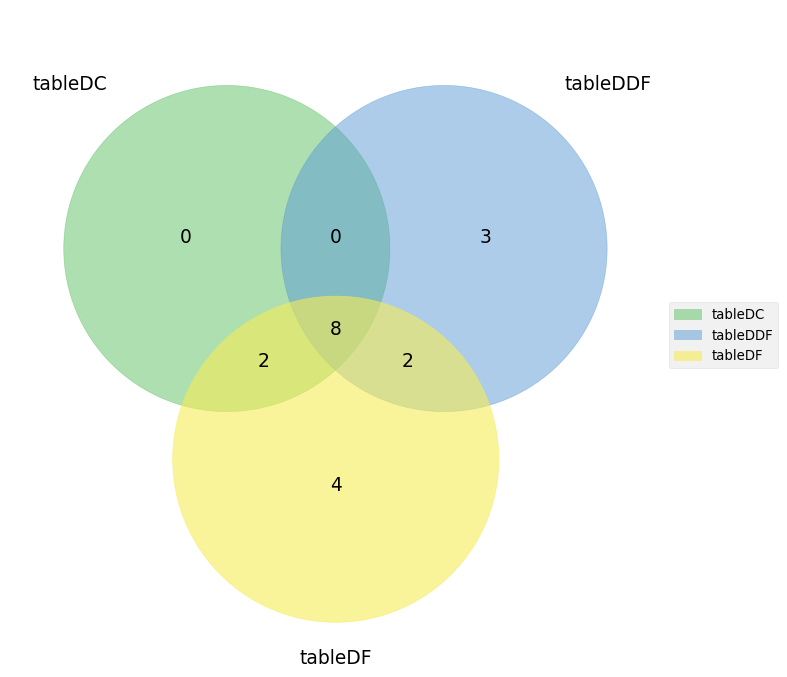

In [67]:


labels = venn.get_labels([table_dict['tableDC'],table_dict['tableDDF'],table_dict['tableDF']])


fig, ax = venn.venn3(labels, names=['tableDC', 'tableDDF', 'tableDF'])
plt.savefig('venn.png')
plt.savefig('venn.svg')
plt.show()


In [63]:
table_dict

{'tableDC': ['Tb927.11.12100',
  'Tb427.BES129.2',
  'Tb427.BES129.3',
  'Tb427.BES129.4',
  'Tb427VSG-1316',
  'Tb427VSG-1559',
  'Tb427VSG-6609',
  'MSTRG.118',
  'TRY.133',
  'KS17gene_4150a'],
 'tableDDF': ['Tb927.8.2861',
  'Tb927.4.4860',
  'Tb927.10.10220',
  'Tb927.10.10230',
  'Tb927.11.12100',
  'Tb427.BES129.2',
  'Tb427.BES129.3',
  'Tb427.BES129.4',
  '9S-rRNA',
  'Tb427VSG-1559',
  'Tb427VSG-6609',
  'TRY.133',
  'KS17gene_4150a'],
 'tableDF': ['Tb927.10.10220',
  'Tb927.10.10230',
  'Tb927.10.10240',
  'Tb927.11.12100',
  'Tb927.3.1470',
  'Tb927.3.1520',
  'Tb427.BES129.2',
  'Tb427.BES129.3',
  'Tb427.BES129.4',
  'Tb427VSG-1316',
  'Tb427VSG-1559',
  'Tb427VSG-3106',
  'Tb427VSG-6609',
  'MSTRG.118',
  'TRY.133',
  'KS17gene_4150a']}

In [2]:
#!git clone https://github.com/tctianchi/pyvenn.git

/usr/bin/sh: git: command not found


In [137]:
common = set(table_dict['tableDC']) & set(table_dict['tableDDF']) & set(table_dict['tableDF'])
common

{'KS17gene_4150a',
 'TRY.133',
 'Tb427.BES129.2',
 'Tb427.BES129.3',
 'Tb427.BES129.4',
 'Tb427VSG-1559',
 'Tb427VSG-6609',
 'Tb927.11.12100'}

No handles with labels found to put in legend.
No handles with labels found to put in legend.


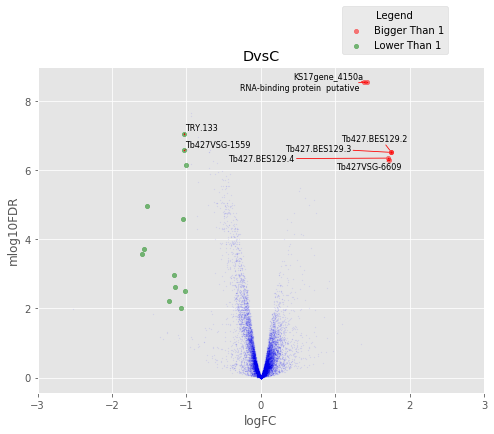

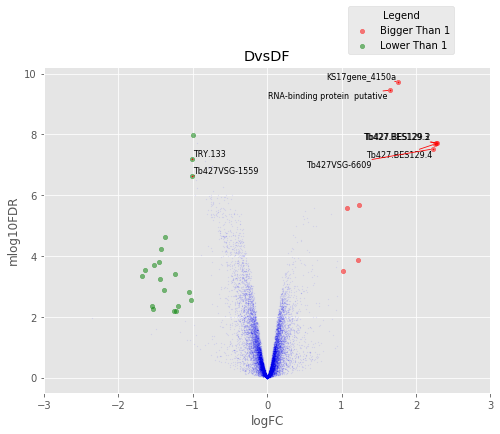

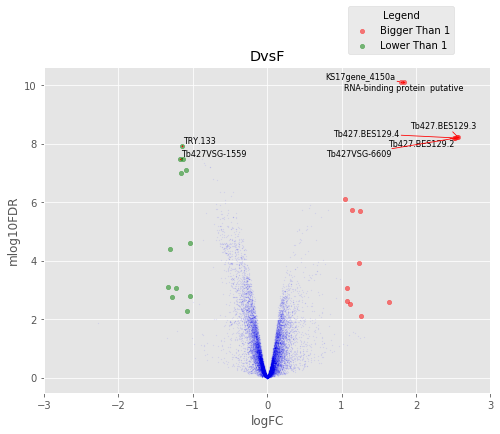

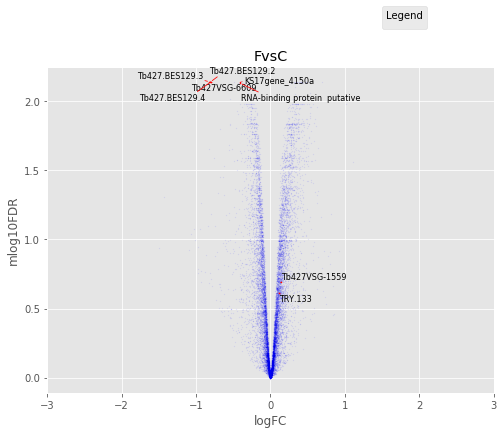

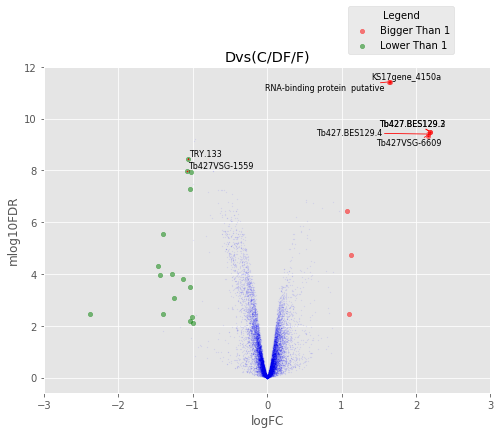

In [180]:
for table,name in zip([tableDC,tableDDF,tableDF,tableFC,table_mine],
                 ['DvsC','DvsDF','DvsF','FvsC','Dvs(C/DF/F)']):
    annotated_volcano(table,name,selection=list(common))

In [21]:
!conda env export --from-history -f environment.yml